## Section 1: Business Understanding

Looking at the happiness index from the Kaggle dataset "https://www.kaggle.com/unsdsn/world-happiness"
This dataset is from 2015 - 2019. Countries are ranked by happiness and factors that contribute to a happiness score. 

I wanted to take a look at what factors cause people to respond as being happy. The happiness survey is a survey done for eacxh country which presents a few metrics and shows how these metrics influence the happiness score. By Analysing the data I wanted to see if factors influencing happiness stay constant through time as well as look at the size of impact. Can happiness be predicted and what do people need in order to be happy?

There are 6 main factors:
Perception of government trust
Generosity
GDP per capita
Health/life expectancy
Social Support
Freedom to make life choices

For the purpose of the assignment I would like to answer the following:

    1. Do the expanatory variables change in effect over time?
    2  By combining all the years into one dataset what are the major factors.
    3  How does wealth compare to generosity and social support.
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline



## Section 2: Data Understanding

Load in all the files and check data sets. Checking the columns in the data so that we can make them uniform and discard the columns not needed in each dataframe to gather the data.

Look at the data size and the columns.

In [2]:
df_2015 = pd.read_csv('./2015.csv')
df_2016 = pd.read_csv('./2016.csv')
df_2017 = pd.read_csv('./2017.csv')
df_2018 = pd.read_csv('./2018.csv')
df_2019 = pd.read_csv('./2019.csv')

display(df_2015.head(2))
display(df_2015.shape)
display(df_2016.head(2))
display(df_2016.shape)
display(df_2017.head(2))
display(df_2017.shape)
display(df_2018.head(2))
display(df_2018.shape)
display(df_2019.head(2))
display(df_2019.shape)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


(158, 12)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


(157, 13)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


(155, 12)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


(156, 9)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


(156, 9)

The columns can be mapped for each year. The number of countries repsonding appears to be around 155 to 158 so I am assuming we can compare these datatsets. There are some statistical columns which can be removed for my analysis as they are different for each year. Some of the columns are not an exact match but I will assume the intention of the survey is to capture the same idea behind the metric. The is Social Support and Freedom to make life choices.

For my purposes we wont be looking at country, the rest of the explanantory variables are floats.

looking at the descriptive stats for each dataset

In [3]:
display(df_2015.describe())
display(df_2016.describe())
display(df_2017.describe())
display(df_2018.describe())
display(df_2019.describe())


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


## Section 3: Preparing the data

Overall Ranking doesnt assist with the analysis as we only want to see variables impacting score
The statistic metrics dont assist with the analysis so can be dropped. 

In [4]:
df_2015_clean = df_2015.drop(columns = ['Happiness Rank', 'Region', 'Standard Error', 'Dystopia Residual'])
df_2016_clean = df_2016.drop(columns = ['Happiness Rank', 'Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])
df_2017_clean = df_2017[['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
                         'Freedom', 'Trust..Government.Corruption.', 'Generosity']]
df_2018_clean = df_2018[['Country or region', 'Score','GDP per capita', 'Social support','Healthy life expectancy', 
                         'Freedom to make life choices','Perceptions of corruption', 'Generosity']]
df_2019_clean = df_2019[['Country or region', 'Score','GDP per capita', 'Social support','Healthy life expectancy', 
                         'Freedom to make life choices','Perceptions of corruption', 'Generosity']]


display(df_2015_clean.head(1))
print(df_2015_clean.shape[1])
print(df_2015_clean.isna().sum())

display(df_2016_clean.head(1))
print(df_2016_clean.shape[1])
print(df_2016_clean.isna().sum())

display(df_2017_clean.head(1))
print(df_2017_clean.shape[1])
print(df_2017_clean.isna().sum())

display(df_2018_clean.head(1))
print(df_2018_clean.shape[1])
print(df_2018_clean.isna().sum())

display(df_2019_clean.head(1))
print(df_2019_clean.shape[1])
print(df_2019_clean.isna().sum())

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678


8
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64


,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171


8
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64


,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012


8
Country                          0
Happiness.Score                  0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Trust..Government.Corruption.    0
Generosity                       0
dtype: int64


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202


8
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       1
Generosity                      0
dtype: int64


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Finland,7.769,1.34,1.587,0.986,0.596,0.393,0.153


8
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
dtype: int64


I've checked for missing values above

There is one missing variable from 2018 on the perception if corruption. I ve taken the mean of that column since the standard deviation is quite low

In [5]:
df_2018_clean.fillna(df_2018_clean.mean())

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256
...,...,...,...,...,...,...,...,...
151,Yemen,3.355,0.442,1.073,0.343,0.244,0.064,0.083
152,Tanzania,3.303,0.455,0.991,0.381,0.481,0.097,0.270
153,South Sudan,3.254,0.337,0.608,0.177,0.112,0.106,0.224
154,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.038,0.218


Rename the columns so that each dataset matches. I will map the columns to the 2018 and 2019 labels. So I can compare datasets easily as well as combine the data

In [6]:
df_2015_clean.rename(columns={'Country': 'Country or region',
                              'Happiness Score': 'Score',
                              'Economy (GDP per Capita)': 'GDP per capita',
                              'Family': 'Social support',
                              'Health (Life Expectancy)': 'Healthy life expectancy',
                              'Freedom': 'Freedom to make life choices',
                              'Trust (Government Corruption)': 'Perceptions of corruption' 
                             }, inplace=True)

df_2016_clean.rename(columns={'Country': 'Country or region',
                              'Happiness Score': 'Score',
                              'Economy (GDP per Capita)': 'GDP per capita',
                              'Family': 'Social support',
                              'Health (Life Expectancy)': 'Healthy life expectancy',
                              'Freedom': 'Freedom to make life choices',
                              'Trust (Government Corruption)': 'Perceptions of corruption' 
                             }, inplace=True)

df_2017_clean = df_2017_clean.rename(columns={'Country': 'Country or region',
                              'Happiness.Score': 'Score',
                              'Economy..GDP.per.Capita.': 'GDP per capita',
                              'Family': 'Social support',
                              'Health..Life.Expectancy.': 'Healthy life expectancy',
                              'Freedom': 'Freedom to make life choices',
                              'Trust..Government.Corruption.': 'Perceptions of corruption' 
                             })


display(df_2015_clean.head(1))
display(df_2016_clean.head(1))
display(df_2017_clean.head(1))
display(df_2018_clean.head(1))
display(df_2019_clean.head(1))


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Finland,7.769,1.34,1.587,0.986,0.596,0.393,0.153


In [7]:
df_2018_clean = df_2018_clean.fillna(df_2018_clean.mean())

I combine all the datasets into one, so that I can run a regression model over the entire dataset

In [8]:
df_group = df_2015_clean.append(df_2016_clean.append(df_2017_clean.append(df_2018_clean.append(df_2019_clean))))
display(df_group.sort_values('Score', ascending=True).head())
display(df_group.sort_values('Score', ascending=True).tail())

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
154,Central African Republic,2.693,0.000000,0.000000,0.018773,0.270842,0.056565,0.280876
157,Togo,2.839,0.208680,0.139950,0.284430,0.364530,0.107310,0.166810
155,South Sudan,2.853,0.306000,0.575000,0.295000,0.010000,0.091000,0.202000
153,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435
156,Burundi,2.905,0.068310,0.234420,0.157470,0.043200,0.094190,0.202900


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Norway,7.594,1.45600,1.58200,0.86100,0.68600,0.34000,0.28600
1,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.41000,0.25200
0,Finland,7.632,1.30500,1.59200,0.87400,0.68100,0.39300,0.20200
0,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.39300,0.15300


## Section 4: Modelling

I want to see any correlations between the variables over the years.

<AxesSubplot:>

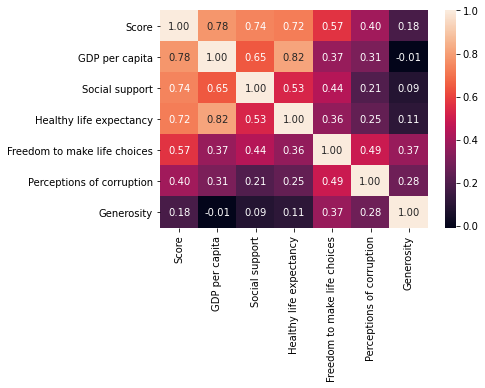

In [9]:
display(sns.heatmap(df_2015_clean.corr(), annot=True, fmt=".2f"))

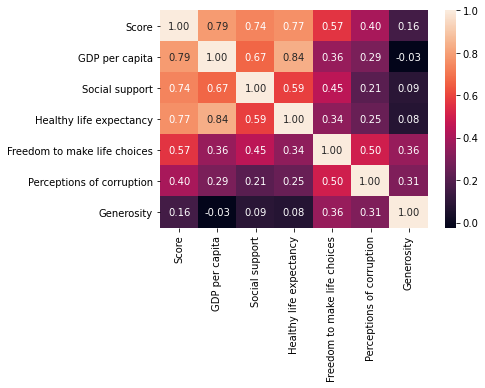

In [10]:
sns.heatmap(df_2016_clean.corr(), annot=True, fmt=".2f");

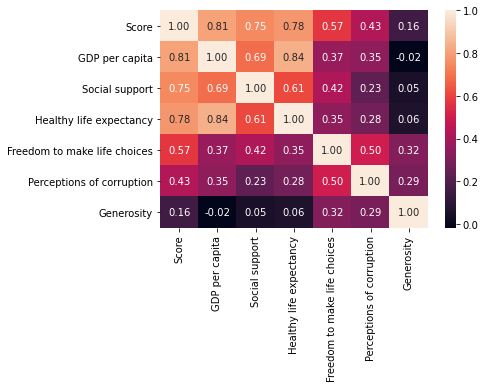

In [11]:
sns.heatmap(df_2017_clean.corr(), annot=True, fmt=".2f");

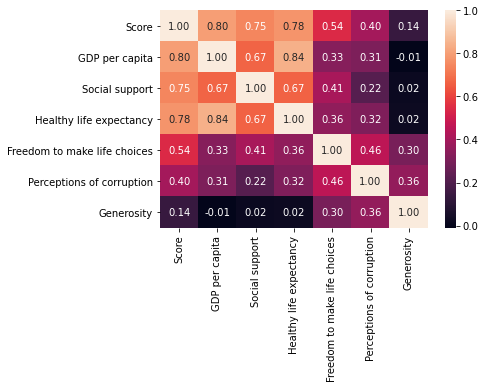

In [12]:
sns.heatmap(df_2018_clean.corr(), annot=True, fmt=".2f");

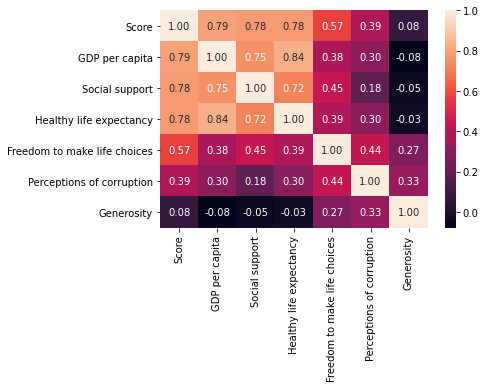

In [13]:
sns.heatmap(df_2019_clean.corr(), annot=True, fmt=".2f");

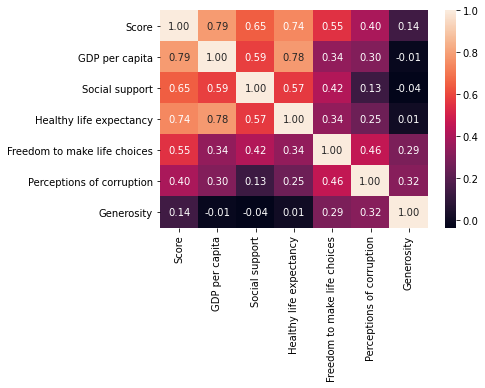

In [14]:
sns.heatmap(df_group.corr(), annot=True, fmt=".2f");

Running the linear regression models below will allow me to answer questions 1 and 2.
Using the function from the udacity lessons, I split the datasets for each year and the combined into training of 70% of the data and a test set of 30%.
    1. Do the expanatory variables change in effect over time?
    2  By combining all the years into one dataset what are the major factors.

I am also able to look at question 3.
  3  How does wealth compare to generosity and social support.

In [15]:
def clean_fit_linear_mod(df, response_col, test_size=0.3, rand_state=42):
    

    #Split into explanatory and response variables
    X = df.select_dtypes(include=['float', 'int'])
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


def coef_weights(coefficients, X_train):
   
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df



In [16]:
#2015 Date
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2015_clean, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))


The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
4,Freedom to make life choices,-8.052286e-15,8.052286e-15
5,Perceptions of corruption,6.883425e-15,6.883425e-15
2,Social support,4.974185e-15,4.974185e-15
3,Healthy life expectancy,-2.860420e-15,2.860420e-15
6,Generosity,2.138216e-15,2.138216e-15
1,GDP per capita,5.625086e-16,5.625086e-16


In [17]:
#2016 Date
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2016_clean, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
4,Freedom to make life choices,8.501350e-15,8.501350e-15
5,Perceptions of corruption,-7.418715e-15,7.418715e-15
2,Social support,5.363673e-15,5.363673e-15
3,Healthy life expectancy,-3.824292e-15,3.824292e-15
6,Generosity,-2.676704e-15,2.676704e-15
1,GDP per capita,-6.231703e-16,6.231703e-16


In [18]:
#2017 Date
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2017_clean, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
4,Freedom to make life choices,1.955079e-14,1.955079e-14
5,Perceptions of corruption,-1.641600e-14,1.641600e-14
2,Social support,-1.125545e-14,1.125545e-14
3,Healthy life expectancy,1.012913e-14,1.012913e-14
6,Generosity,-2.584676e-15,2.584676e-15
1,GDP per capita,1.795433e-15,1.795433e-15


In [19]:
#2018 Date
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2018_clean, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
5,Perceptions of corruption,-2.678628e-15,2.678628e-15
6,Generosity,2.515536e-15,2.515536e-15
1,GDP per capita,2.005189e-15,2.005189e-15
3,Healthy life expectancy,1.077961e-15,1.077961e-15
2,Social support,8.460930e-16,8.460930e-16
4,Freedom to make life choices,5.172953e-16,5.172953e-16


In [20]:
#2019 Date
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2019_clean, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
5,Perceptions of corruption,-9.042138e-16,9.042138e-16
4,Freedom to make life choices,-8.541837e-16,8.541837e-16
6,Generosity,-4.813481e-16,4.813481e-16
3,Healthy life expectancy,-4.558144e-16,4.558144e-16
1,GDP per capita,-3.316713e-16,3.316713e-16
2,Social support,-5.967017e-17,5.967017e-17


In [21]:
#All dates
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_group, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
6,Generosity,7.645862e-15,7.645862e-15
5,Perceptions of corruption,-7.555580e-15,7.555580e-15
4,Freedom to make life choices,-1.374951e-15,1.374951e-15
2,Social support,1.109595e-15,1.109595e-15
3,Healthy life expectancy,5.739287e-16,5.739287e-16
1,GDP per capita,3.741377e-16,3.741377e-16


The above regression models have both an R training and test score of 1, which suggests the variables explain the criterion varaiable. I want to see further correlations between GDP per capita, generosity and Social Support.

In [22]:
df_group.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Score,1.000000,0.789284,0.648799,0.742456,0.551258,0.397821,0.137578
GDP per capita,0.789284,1.000000,0.585966,0.784338,0.340511,0.304181,-0.014560
Social support,0.648799,0.585966,1.000000,0.572650,0.420361,0.126481,-0.037262
Healthy life expectancy,0.742456,0.784338,0.572650,1.000000,0.340745,0.250463,0.010638
Freedom to make life choices,0.551258,0.340511,0.420361,0.340745,1.000000,0.459520,0.290706
Perceptions of corruption,0.397821,0.304181,0.126481,0.250463,0.459520,1.000000,0.318945
Generosity,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318945,1.000000


Looking at histograms I wanted to see what amount of respondents scored higher in each category to see what

array([[<AxesSubplot:title={'center':'GDP per capita'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'Generosity'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'Social support'}>]], dtype=object)

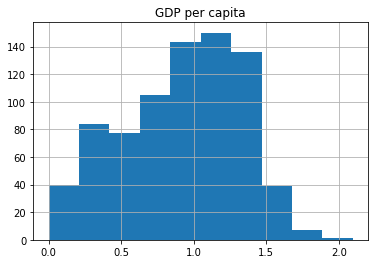

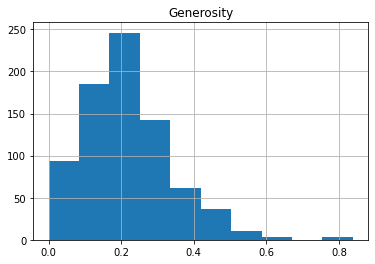

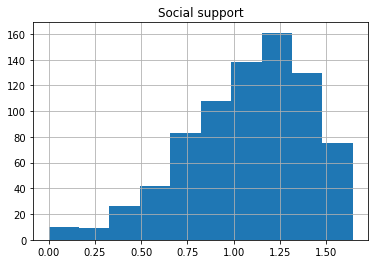

In [25]:
display(df_group.hist(column='GDP per capita'))
display(df_group.hist(column='Generosity'))
display(df_group.hist(column='Social support'))

## Section 5: Evaluation

  Looking at correlation it showed that generosity and GDP per capita were negatively ocrrelated. It appears that the wealthier countries put more weighting on GDP but less on generosity, whereas the lower income countries have generaosity as a major factor in their happiness score.

Question 1: Do the expanatory variables change in effect over time?

I discovered through the analysis that the factors did change over time. The most consistently highly weighted factor was the perception of government corruption and freedom to make life choices. The less corruption was perceived and the more freedom over life choices the better the happiness score. The 2016 dataset however stood out in that perception of corruption was the lowest factor whereas in all other years it was the highest.

Question 2: y combining all the years into one dataset what are the major factors?

When looking at combined dataset it appeared that those with the highest co-efficient and relationship to happiness were genrosity, freedom to make life choices and the perception of government. Generosity has a positive effect on happiness while perception of corruption has an almost equal negative effect. After that is was freedom to make life choices. Throughout each year these factors were consistent in ranking high. 

Interestingly GDP per capita has the lowest effect with the combined dataset

Question 3: How does wealth compare to generosity and social support.

Wealth was more commonly distributed across scores that generosity. Social support on the other hand had a distribution more towards higher scores. Looking at the correlation it appears that GDP per capita and social support are quite highle positvely correlated. Genrosity and welath were negato